In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [333]:
df=pd.read_csv(r"D:\Users\abhisv\Desktop\results.csv")

In [334]:
df.shape

(41586, 9)

In [335]:
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


#### date=Date of the match
#### home_team=Name of the home team.
#### away_team=Name of the away team.
#### home_score=Home team goals.
#### away_score=Away team goals.
#### tournament=Tournament name.
#### city=City where the match took place.
#### country=Country where the match took place.
#### neutral=Whether the match took place at a neutral venue or not.

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41586 entries, 0 to 41585
Data columns (total 9 columns):
date          41586 non-null object
home_team     41586 non-null object
away_team     41586 non-null object
home_score    41586 non-null int64
away_score    41586 non-null int64
tournament    41586 non-null object
city          41586 non-null object
country       41586 non-null object
neutral       41586 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [337]:
df['date']=df['date'].apply(pd.to_datetime)

In [338]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [339]:
df.drop('date',axis=1,inplace=True)

In [340]:
cat=[features for features in df if df[features].dtype=='O']
print(cat)

['home_team', 'away_team', 'tournament', 'city', 'country']


In [341]:
numerical=[features for features in df if df[features].dtype!='O']
print(numerical)

['home_score', 'away_score', 'neutral', 'year', 'month', 'day']


In [342]:
#Lets visualize some of the patterns

In [343]:
df.head(3)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,8
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7


In [344]:
df_home_team=df.groupby('home_team')[['home_score']].sum().sort_values(by='home_score',ascending=False).reset_index()

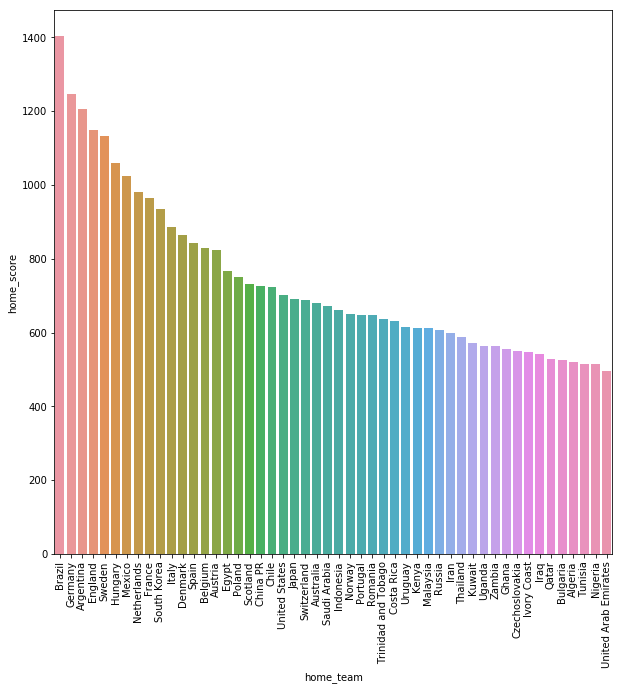

In [345]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_home_team.home_team[:50],y=df_home_team.home_score[:50])
plt.xticks(rotation=90)
plt.show()
#Brazil as score highest goals when played in home ground,

In [346]:
df_away_team=df.groupby('away_team')[['away_score']].sum().sort_values(by='away_score',ascending=False).reset_index()

In [347]:
df_away_team[df_away_team['away_team']=='Brazil']

,away_team,away_score
5,Brazil,746


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

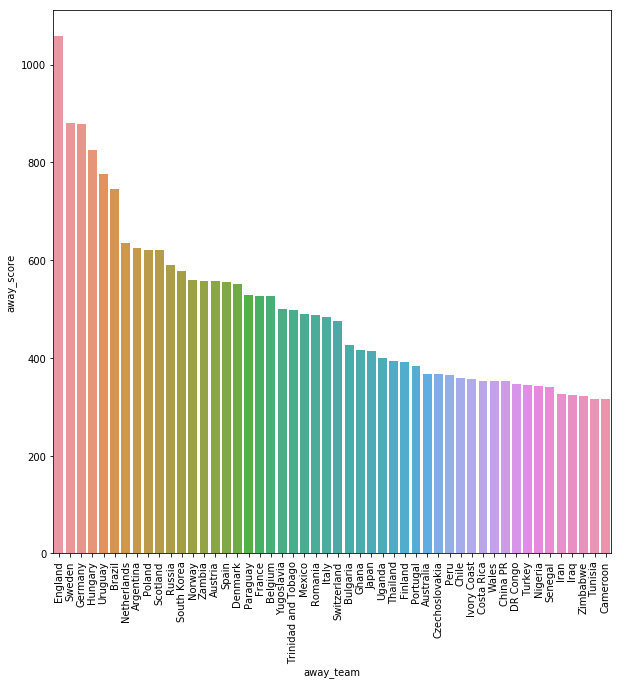

In [348]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_away_team['away_team'][:50],y=df_away_team['away_score'][:50])
plt.xticks(rotation=90)
#England as scored highest goals when played away. And brazil which as scored highest goals in home ground as came to 6th place when played away.

In [349]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,8
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,6
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4


In [350]:
#Q1) Which team played the largest number of matches throughout history?

In [351]:
num_of_teams = 10
tournaments_of_interest = ['Friendly', 'FIFA World Cup', 'UEFA Euro', 'African Cup of Nations', 'CFU Caribbean Cup', 
                           'Copa América', 'AFC Asian Cup', 'Other']
cdf1 = df[['home_team', 'tournament']].rename(columns={'home_team': 'team'})
cdf2 = df[['away_team', 'tournament']].rename(columns={'away_team': 'team'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf.replace(to_replace={'FIFA World Cup qualification': 'FIFA World Cup', 'UEFA Euro qualification': 'UEFA Euro',
                        'African Cup of Nations qualification': 'African Cup of Nations', 'AFC Asian Cup qualification':
                        'AFC Asian Cup', 'CFU Caribbean Cup qualification': 'CFU Caribbean Cup'}, 
            value=None, inplace=True)
cdf['count'] = 1
cdf_piv = cdf.pivot_table(values='count', index='team', columns='tournament', aggfunc=np.sum, fill_value=0)
tournament_counts = cdf['tournament'].value_counts(sort=True, ascending=False)
teams = df['home_team'].append(df['away_team'], ignore_index=True)
team_counts = teams.value_counts().sort_values(ascending=False).head(num_of_teams)
s_df = pd.DataFrame(columns=tournaments_of_interest, index=team_counts.index)

In [352]:
for i in range(s_df.shape[0]):
    t = s_df.index[i]
    team_tournament_counts = []
    for col in s_df.columns:
        if col != 'Other':
            team_tournament_counts.append(cdf_piv.loc[t, col])
        else:
            team_tournament_counts.append(team_counts.loc[t] - np.sum(team_tournament_counts))
    s_df.loc[t, :] = team_tournament_counts

Text(98.875, 0.5, 'No of matches')

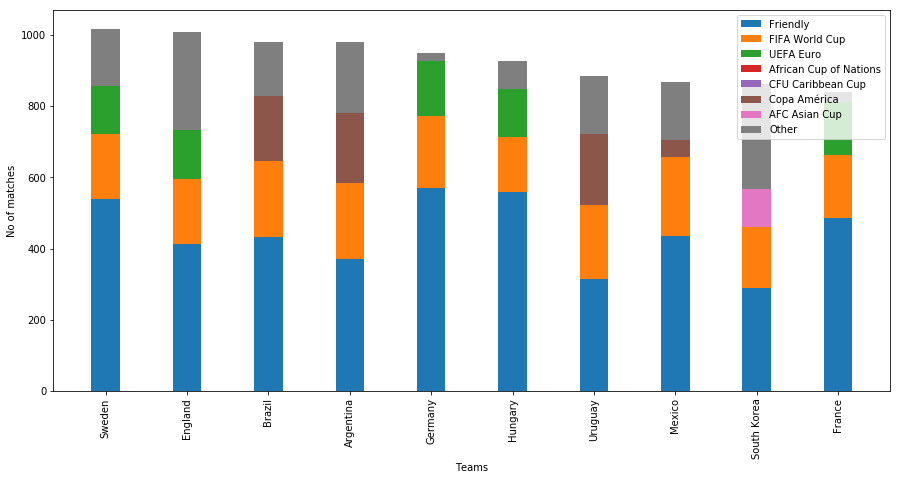

In [353]:
ind = np.arange(num_of_teams); b_w = 0.35
fig, ax = plt.subplots(figsize=(15,7));
prev = np.zeros(num_of_teams)
for i,col in enumerate(s_df.columns):
    ax.bar(ind, s_df[col].values.flatten(), width=b_w, bottom=prev,label=col);
    prev += s_df[col].values.flatten()
ax.set_xticks(ind);
ax.set_xticklabels(s_df.index.values, rotation=90);
plt.legend(loc=1);
plt.savefig('fban-played-more.png', dpi=300)
plt.xlabel('Teams')
plt.ylabel('No of matches')

Which team played the largest number of matches in FIFA World Cup?

In [354]:
df_fifa1=df[df['tournament']=='FIFA World Cup qualification'][['home_team']].rename(columns={'home_team':'team'})
df_fifa2=df[df['tournament']=='FIFA World Cup qualification'][['away_team']].rename(columns={'away_team':'team'})
df_fifa=pd.concat([df_fifa1,df_fifa2],axis=0,ignore_index=True)

Costa Rica       166
Mexico           165
Uruguay          152
Paraguay         151
Colombia         151
United States    149
Bolivia          148
Peru             145
Chile            142
Australia        141
Name: team, dtype: int64

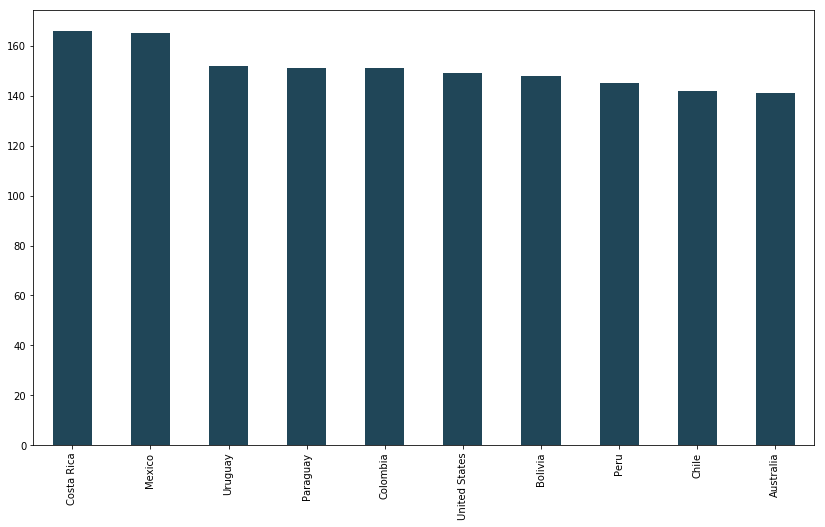

In [355]:
ax=df_fifa['team'].value_counts().head(10).plot(kind='bar', figsize=(14,8), color='#204658')
display(df_fifa['team'].value_counts().head(10))

Which team achieved more wins than others over the years?

In [356]:
#In order to know the winning team we need to create two columns one for result and other for draw
def getmatchresult(scores):
    if scores['home_score']>scores['away_score']:
        return 'home_win'
    elif scores['home_score']==scores['away_score']:
        return 'draw'
    else:
        return 'away_win'
    
df['result']=df[['home_score','away_score']].apply(getmatchresult,axis=1)

In [357]:
#Adding winning team name
def winningteam(d):
    if d['result']=='draw':
        return 'draw'
    elif d['result']=='home_win':
        return d['home_team']
    else:
        return d['away_team']
    
df['winner']=df[['home_team','away_team','result']].apply(winningteam,axis=1)

In [358]:
df.head(3)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,result,winner
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,draw,draw
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,8,home_win,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7,home_win,Scotland


In [359]:
cdf=df[df['winner']!='draw']
winner_counts=cdf['winner'].value_counts().sort_values(ascending=False).head(10).reset_index()

In [360]:
winner_counts=winner_counts.rename(columns={'index':'winner','winner':'count'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

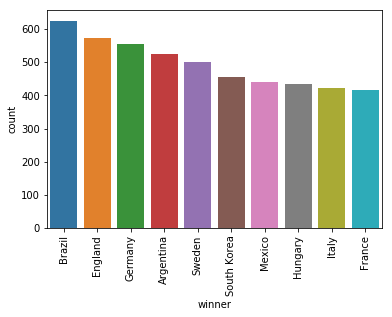

In [361]:
sns.barplot(winner_counts['winner'],winner_counts['count'])
plt.xticks(rotation=90)#Brazil as won highest matches

Which team lost more matches than others over the years?

In [362]:
def lostteam(s):
    if s['result']=='draw':
        return 'draw'
    elif s['result']=='home_win':
        return s['away_team']
    else:
        return s['home_team']
    
df['loser']=df[['home_team','away_team','result']].apply(lostteam,axis=1)

In [363]:
df.head(3)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,result,winner,loser
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,draw,draw,draw
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,8,home_win,England,Scotland
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7,home_win,Scotland,England


In [364]:
cdf=df[df['loser']!='draw']
loaser_counts=cdf['loser'].value_counts().sort_values(ascending=False).head(10).reset_index()

In [365]:
loaser_counts=loaser_counts.rename(columns={'index':'loser','loser':'count'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

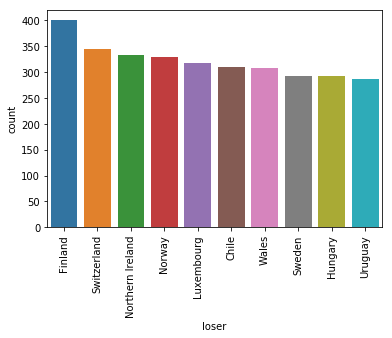

In [366]:
sns.barplot(loaser_counts['loser'],loaser_counts['count'])
plt.xticks(rotation=90)

Which team scored the largest number of goals throughout history?

In [367]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,result,winner,loser
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,draw,draw,draw
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,8,home_win,England,Scotland
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7,home_win,Scotland,England
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,6,draw,draw,draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4,home_win,Scotland,England


Which team scored the largest number of goals in FIFA World Cup?

In [428]:
df['total_goals']=df['home_score']+df['away_score']

In [433]:
df[df['total_goals']==df['total_goals'].max()]

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,result,winner,loser,total_goals
23796,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,4,11,home_win,Australia,American Samoa,31


Which teams played against each other the most?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

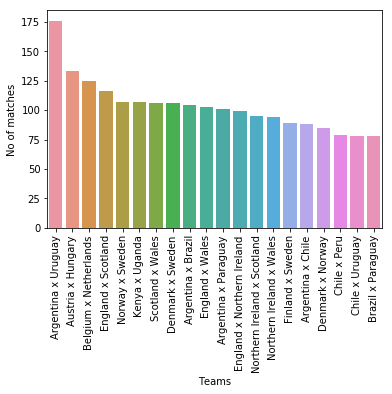

In [468]:
from collections import Counter
playing_teams=[]
for i in range(df.shape[0]):
    two_teams=[df.loc[i,'home_team'],df.loc[i,'away_team']]
    two_teams.sort()
    playing_teams.append(tuple(two_teams))
common_playing_teams=Counter(playing_teams).most_common(20)
common_playing_teams=[(' x '.join(a), b) for a,b in common_playing_teams]
common_playing_teams=pd.DataFrame(common_playing_teams,columns=['Teams','No of matches'])
sns.barplot(common_playing_teams['Teams'],common_playing_teams['No of matches'])
plt.xticks(rotation=90)

Do Friendly Matches Have Less or More Goals than Non-Friendly Matches?

In [469]:
df.head(1)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,result,winner,loser,total_goals
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,draw,draw,draw,0


In [470]:
friendly_goals=df[df['tournament']=='Friendly']['total_goals'].sum()
friendly_count=df[df['tournament']=='Friendly']['total_goals'].shape[0]
friendly_avg_goals=friendly_goals/friendly_count

In [472]:
Nfriendly_goals=df[df['tournament']!='Friendly']['total_goals'].sum()
Nfriendly_count=df[df['tournament']!='Friendly']['total_goals'].shape[0]
Nfriendly_avg_goals=Nfriendly_goals/Nfriendly_count

Text(0.5, 1.0, 'Average Number of goals in friendly vs. Non friendly matches')

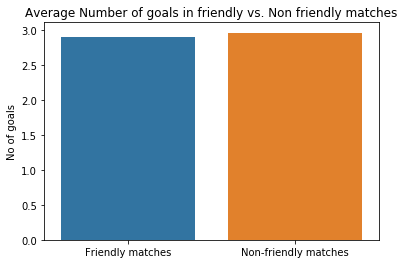

In [474]:
sns.barplot(x=['Friendly matches', 'Non-friendly matches'],y=[friendly_avg_goals,Nfriendly_avg_goals])
plt.ylabel('No of goals')
plt.title('Average Number of goals in friendly vs. Non friendly matches')

In which tournament players tend to score more goals?

In [476]:
df[df['total_goals']==df['total_goals'].max()]

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,result,winner,loser,total_goals
23796,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,4,11,home_win,Australia,American Samoa,31


In [502]:
cdf1=df[['tournament','total_goals']].copy()
tournament_num_matches =cdf1.groupby('tournament')['total_goals'].count()
tournament_num_matches=pd.DataFrame(tournament_num_matches).rename(columns={'total_goals': 'match_count'})

In [519]:
cdf2=pd.DataFrame(df.groupby('tournament')['total_goals'].sum().sort_values(ascending=False).head(10).sort_values())
cdf2['avg_goals']=0
for i in range(cdf2.shape[0]):
    t=cdf2.index[i]
    mc=tournament_num_matches.loc[t,'match_count']
    cdf2.iloc[i, 1] = cdf2.iloc[i, 0] / mc

In [527]:
cdf2.drop('total_goals',axis=1,inplace=True)

In [528]:
cdf2.sort_values(by='avg_goals',inplace=True)

In [532]:
cdf2=cdf2.reset_index()

In [533]:
cdf2

,tournament,avg_goals
0,African Cup of Nations qualification,2.381579
1,UEFA Euro qualification,2.829589
2,FIFA World Cup,2.831111
3,FIFA World Cup qualification,2.887369
4,Friendly,2.898702
5,Copa América,3.205412
6,AFC Asian Cup qualification,3.341160
7,Merdeka Tournament,3.341948
8,CFU Caribbean Cup qualification,3.506601
9,British Championship,3.520792


Lets check average goials in each tournament

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

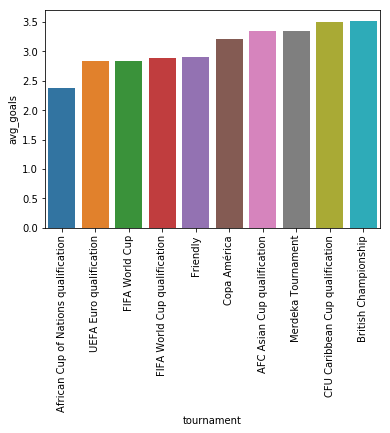

In [540]:
sns.barplot(x=cdf2['tournament'],y=cdf2['avg_goals'])
plt.xticks(rotation=90)

What’s the percentage of matches that ended in draw?

In [543]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,result,winner,loser,total_goals
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,draw,draw,draw,0
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,8,home_win,England,Scotland,6


In [545]:
draw_perc=df[df['result']=='draw'].shape[0]/df.shape[0]

In [546]:
draw_perc

0.23031789544558265

([<matplotlib.patches.Wedge at 0x1a6e2cdf278>,
 [Text(0.8243952802938666, 0.72826672437315, 'Draw'),
  Text(-0.8243952802938668, -0.7282667243731497, 'Non-Draw')],
 [Text(0.4496701528875635, 0.3972363951126272, '23.03%'),
  Text(-0.4496701528875636, -0.39723639511262704, '76.97%')])

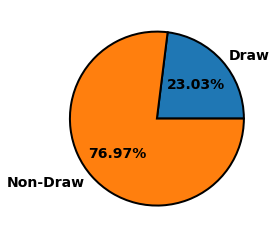

In [552]:
plt.pie([draw_perc,1-draw_perc],labels=['Draw', 'Non-Draw'],autopct='%.2f%%',textprops={'fontsize':14, 'fontweight':'bold'}, 
       wedgeprops={'linewidth': 2, 'edgecolor': 'black'})

What is the number of matches played in each tournament throughout history?

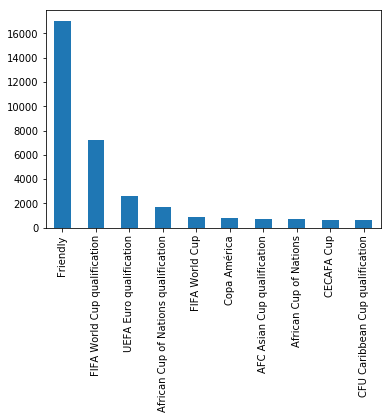

In [560]:
df['tournament'].value_counts().head(10).plot(kind='bar')

In [571]:
year_goals=pd.DataFrame(df.groupby('year')['total_goals'].sum().sort_values(ascending=False))

In [574]:
year_goals=year_goals.reset_index()

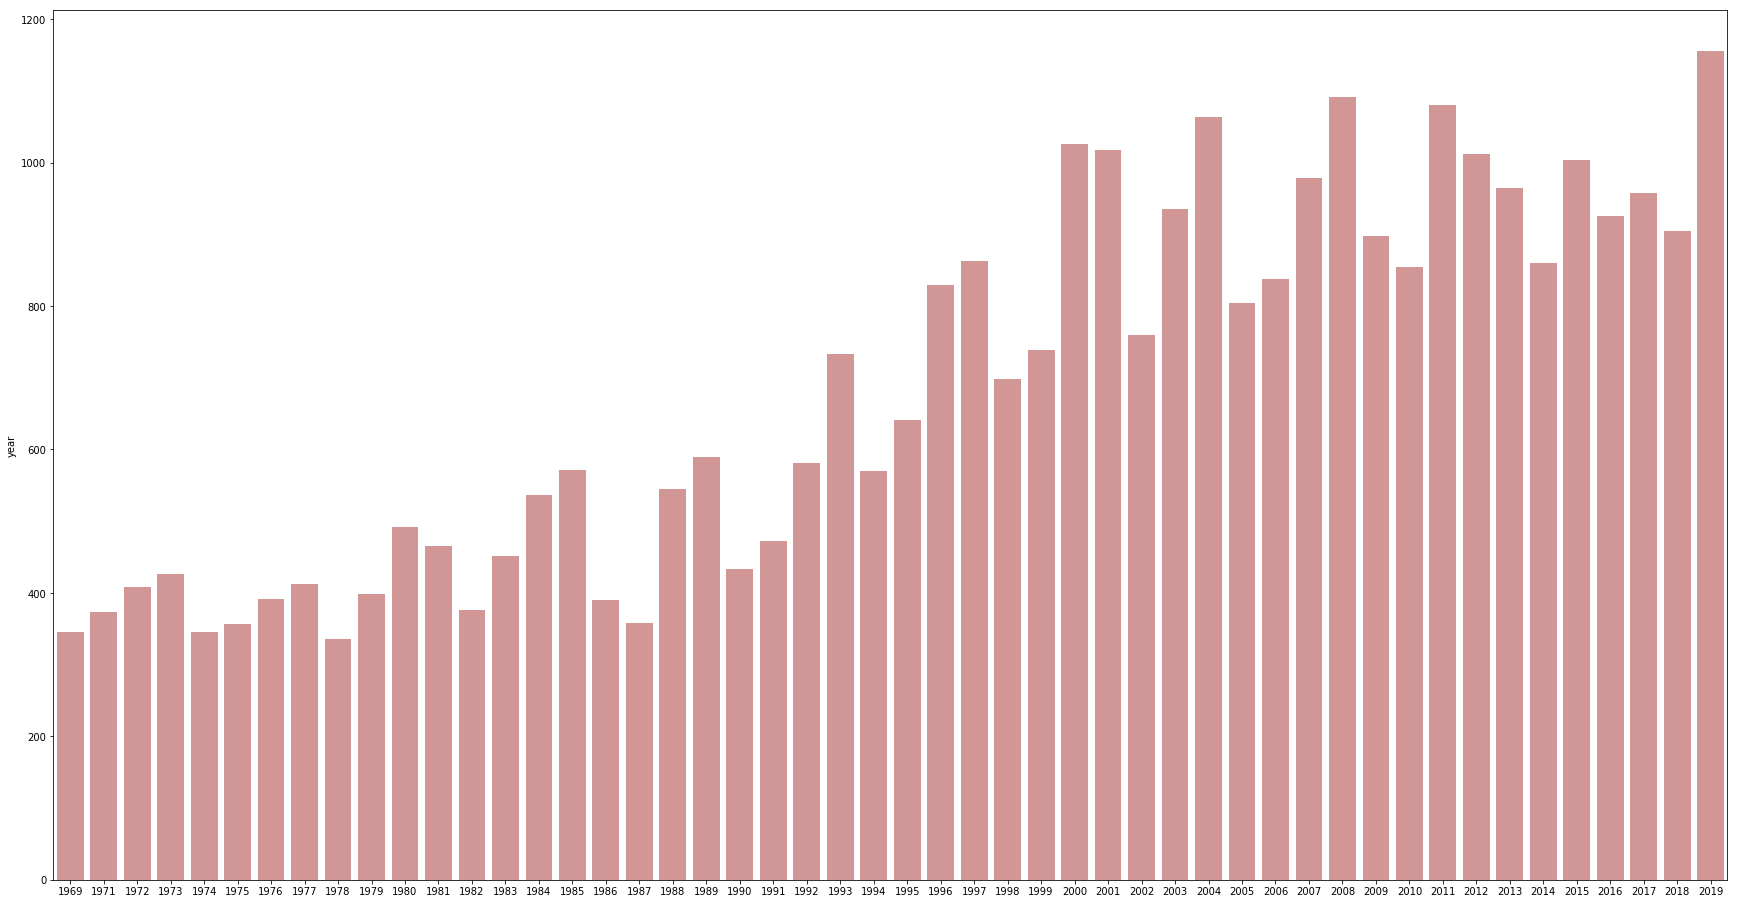

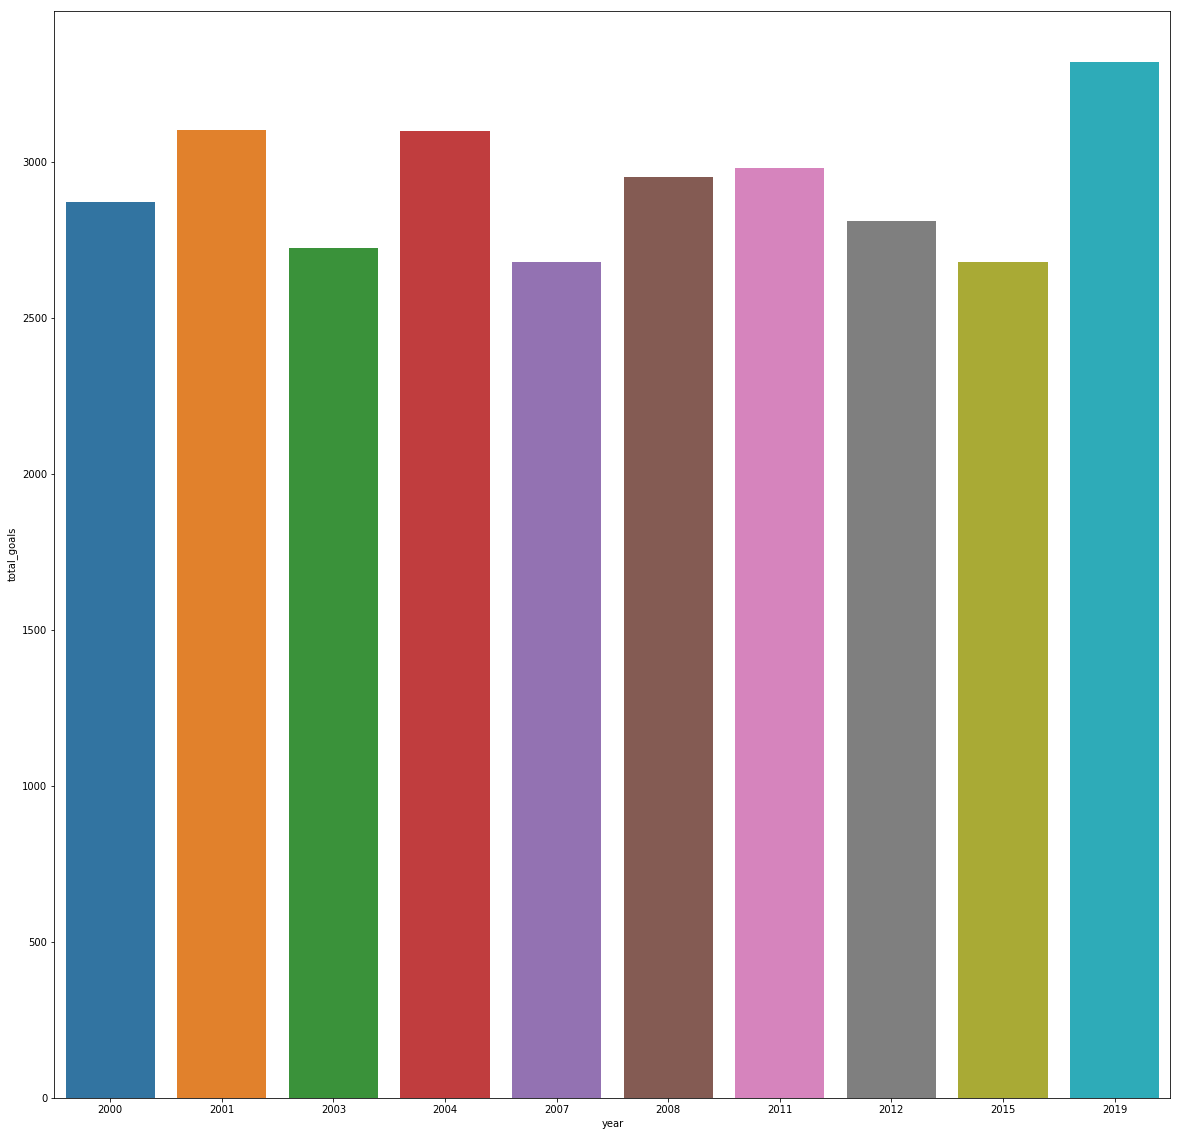

In [584]:
year_counts = df['year'].value_counts().head(50)
fig, ax = plt.subplots(figsize=(30,16));
sns.barplot(x=year_counts.index, y=year_counts, ax=ax, color='#b71c1c', linewidth=0, alpha=0.5);
plt.figure(figsize=(20,20))

sns.barplot(x=year_goals['year'].head(10),y=year_goals['total_goals'])

